<a href="https://colab.research.google.com/github/bdgToji/VNP/blob/main/KOL2_Clustering_Tweets_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Даден е dataset кој содржи твитови со информации поврзани со берза. Вашата задача е да ги кластерирате дадените твитови.

1. Најпрво употребете **Universal Sentence Encoder** за креирање на embeddings за секој твит.
2. Потоа со помош на **PCA** да се изврши намалување на димензионалноста на добиените embeddings така што сега секој од векторите ќе има 10 димензии.
3. Примена на **KMeans** како метод за кластерирање.
4. Најдете го оптималниот број на кластери.
5. Направете 2D визуелизација на кластерите.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('/content/drive/MyDrive/VNP/BTC_Tweets_Sentiment.csv')

In [4]:
df

,id,Date,Tweet,Screen_name,Source,Link,Sentiment,sent_score,New_Sentiment_Score,New_Sentiment_State,BERT Labels
0,0,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",myresumerocket,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral'],0.0,0.000000,0.0,1
1,1,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral'],0.0,0.000000,0.0,0
2,2,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],1.0,0.136364,1.0,0
3,3,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],1.0,0.400000,1.0,0
4,4,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,[],"<a href=""http://twitter.com/download/android"" ...",['positive'],1.0,0.468182,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
50847,50854,Fri Mar 23 08:55:16 +0000 2018,RT @fixy_app: Fixy Network brings popular cryp...,quoting_lives,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],1.0,0.600000,1.0,0
50848,50855,Fri Mar 23 08:55:17 +0000 2018,RT @bethereumteam: After a successful launch o...,VariPewitt,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],1.0,0.375000,1.0,2
50849,50856,Fri Mar 23 08:55:18 +0000 2018,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",urbancoinerz,"[u'GYMRewards', u'ICO', u'cryptocurrency', u'm...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral'],0.0,0.000000,0.0,1
50850,50857,Fri Mar 23 08:55:19 +0000 2018,I added a video to a @YouTube playlist https:/...,MRDanishShahab,[],"<a href=""http://www.google.com/"" rel=""nofollow...",['positive'],1.0,0.400000,1.0,0


In [5]:
df = df.drop(columns=['id','sent_score','New_Sentiment_Score','New_Sentiment_State','BERT Labels'])

In [6]:
df

,Date,Tweet,Screen_name,Source,Link,Sentiment
0,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",myresumerocket,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral']
1,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
2,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
4,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
...,...,...,...,...,...,...
50847,Fri Mar 23 08:55:16 +0000 2018,RT @fixy_app: Fixy Network brings popular cryp...,quoting_lives,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
50848,Fri Mar 23 08:55:17 +0000 2018,RT @bethereumteam: After a successful launch o...,VariPewitt,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
50849,Fri Mar 23 08:55:18 +0000 2018,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",urbancoinerz,"[u'GYMRewards', u'ICO', u'cryptocurrency', u'm...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral']
50850,Fri Mar 23 08:55:19 +0000 2018,I added a video to a @YouTube playlist https:/...,MRDanishShahab,[],"<a href=""http://www.google.com/"" rel=""nofollow...",['positive']


In [8]:
encoder = LabelEncoder()
df['Sentiment'] = encoder.fit_transform(df['Sentiment'])

In [9]:
df

,Date,Tweet,Screen_name,Source,Link,Sentiment
0,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",myresumerocket,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",1
1,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",1
2,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2
3,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2
4,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,[],"<a href=""http://twitter.com/download/android"" ...",2
...,...,...,...,...,...,...
50847,Fri Mar 23 08:55:16 +0000 2018,RT @fixy_app: Fixy Network brings popular cryp...,quoting_lives,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2
50848,Fri Mar 23 08:55:17 +0000 2018,RT @bethereumteam: After a successful launch o...,VariPewitt,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2
50849,Fri Mar 23 08:55:18 +0000 2018,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",urbancoinerz,"[u'GYMRewards', u'ICO', u'cryptocurrency', u'm...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",1
50850,Fri Mar 23 08:55:19 +0000 2018,I added a video to a @YouTube playlist https:/...,MRDanishShahab,[],"<a href=""http://www.google.com/"" rel=""nofollow...",2


In [10]:
df.isna().sum()

Date           0
Tweet          0
Screen_name    0
Source         0
Link           0
Sentiment      0
dtype: int64

# Universal Sentence Encoder

In [11]:
!pip install transformers

In [12]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [14]:
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(df.Tweet.values)

In [15]:
message_embeddings

<tf.Tensor: shape=(50852, 512), dtype=float32, numpy=
array([[-0.03834763, -0.04177495, -0.03000215, ...,  0.05547818,
        -0.05757411, -0.05747128],
       [-0.00023587, -0.04965301, -0.04544644, ..., -0.00699701,
        -0.0817619 , -0.06738114],
       [-0.00882475, -0.06427665, -0.06390414, ...,  0.05352812,
        -0.06909753, -0.0684047 ],
       ...,
       [-0.03637782, -0.07333582, -0.02006671, ...,  0.00748271,
        -0.06006524, -0.0688739 ],
       [-0.01435385, -0.0501017 ,  0.00692282, ..., -0.01416572,
        -0.07574023, -0.07719906],
       [-0.00828403, -0.08008461, -0.03335601, ..., -0.01549363,
        -0.03189274, -0.02582982]], dtype=float32)>

# Dimensionality reduction

In [17]:
from sklearn.decomposition import PCA

data = message_embeddings
pca = PCA(10)

#Transform the data
df_new = pca.fit_transform(data)

# Cluster training

In [18]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(message_embeddings)
clusters = km.labels_.tolist()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
#Initialize the class object
kmeans = KMeans(n_clusters=3)

#predict the labels of clusters.
label = kmeans.fit_predict(df_new)

#Getting unique labels
u_labels = np.unique(label)

labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Visualization of the clusters

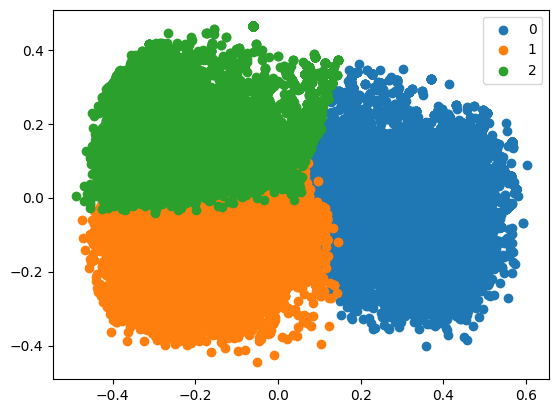

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plotting the results:
for i in u_labels:
    plt.scatter(df_new[label == i , 0] , df_new[label == i , 1] , label = i)
plt.legend()
plt.show()